In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../datasets/backfill_median_data.csv')

# Examining the Data

In [3]:
df.head()

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
0,11 Com b,11 Com,Xinglong Station,326.03000,1.29,12.1,1.08,6165.6000,19.40,0.231,98.09,1700.0
1,11 UMi b,11 UMi,Thueringer Landessternwarte Tautenburg,516.21997,1.53,12.3,1.09,4684.8142,14.74,0.080,98.09,1700.0
2,14 And b,14 And,Okayama Astrophysical Observatory,185.84000,0.83,12.9,1.15,1525.5000,4.80,0.000,98.09,1700.0
3,14 Her b,14 Her,W. M. Keck Observatory,1773.40002,2.93,12.9,1.15,1481.0878,4.66,0.370,98.09,1700.0
4,16 Cyg B b,16 Cyg B,Multiple Observatories,798.50000,1.66,13.5,1.20,565.7374,1.78,0.680,98.09,1700.0


 Dictionary found here:
 https://exoplanetarchive.ipac.caltech.edu/docs/API_PS_columns.html

In [4]:
df.shape

(4364, 12)

In [5]:
df.dtypes

pl_name           object
hostname          object
disc_facility     object
pl_orbper        float64
pl_orbsmax       float64
pl_rade          float64
pl_radj          float64
pl_bmasse        float64
pl_bmassj        float64
pl_orbeccen      float64
pl_insol         float64
pl_eqt           float64
dtype: object

In [6]:
df.describe()

,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
count,4.364000e+03,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000
mean,2.038742e+03,5.421018,5.675148,0.506446,465.744018,1.465821,0.074452,453.786045,931.816453
std,1.105449e+05,91.063696,5.393391,0.481241,4160.491764,13.092439,0.145131,1997.498990,476.461326
min,9.070629e-02,0.004400,0.296000,0.026000,0.020000,0.000060,0.000000,0.060000,50.000000
25%,4.554625e+00,0.052775,1.750000,0.156000,3.890000,0.012293,0.000000,24.582500,577.000000
50%,1.225190e+01,0.101150,2.728000,0.243000,8.400000,0.026400,0.000000,98.090000,840.000000
75%,4.581893e+01,0.260050,11.882000,1.060000,166.378688,0.523500,0.090000,308.632500,1174.500000
max,7.300000e+06,3500.000000,77.342000,6.900000,239000.000000,752.000000,0.950000,44900.000000,4050.000000


# Columns with crazy outliers:
- pl_orbper
- pl_rade
- pl_radj
- pl_bmasse
- pl_bmassj
- pl_insol
- pl_eqt

I'll try to explore those and see if I need to drop them.

In [7]:
df.isna().sum()

pl_name          0
hostname         0
disc_facility    0
pl_orbper        0
pl_orbsmax       0
pl_rade          0
pl_radj          0
pl_bmasse        0
pl_bmassj        0
pl_orbeccen      0
pl_insol         0
pl_eqt           0
dtype: int64

## EDA

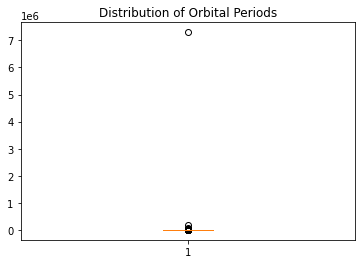

In [8]:
plt.title('Distribution of Orbital Periods')
plt.boxplot(df['pl_orbper']);

That top value is a huge outlier, and will throw off everything.  It's only one planet, so I feel comfortable dropping it from the data.

In [9]:
df['pl_orbper'].max()

7300000.0

In [10]:
df[df['pl_orbper'] == 7300000.0]

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
3991,Oph 11 b,Oph 11,Gemini Observatory,7300000.0,243.0,12.3,1.1,4449.62,14.0,0.19,1.21,2175.0


In [11]:
df = df.drop(index = 3991)

In [12]:
df['pl_orbper'].describe()

count      4363.000000
mean        366.048291
std        3183.392601
min           0.090706
25%           4.553550
50%          12.251900
75%          45.569635
max      170000.000000
Name: pl_orbper, dtype: float64

In [13]:
df[df['pl_orbper'] > 30_000]


,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
1022,HR 8799 b,HR 8799,Gemini Observatory,170000.0,68.0,13.000,1.20,2000.00,7.0,0.50,54.10,1200.0
1023,HR 8799 c,HR 8799,Gemini Observatory,69000.0,38.0,13.000,1.20,3000.00,10.0,0.50,54.10,1200.0
1024,HR 8799 d,HR 8799,W. M. Keck Observatory,37000.0,24.0,13.000,1.20,3000.00,10.0,0.60,54.10,1300.0
3992,PDS 70 b,PDS 70,Paranal Observatory,43500.0,20.0,30.488,2.72,953.49,3.0,0.19,1.21,1204.0


There are a handful of extremely high orbital period planets remaining in my dataset.
I'm opting to leave these in for now:  They are still valid, without being so profoundly
#unusual as Oph 11 b.

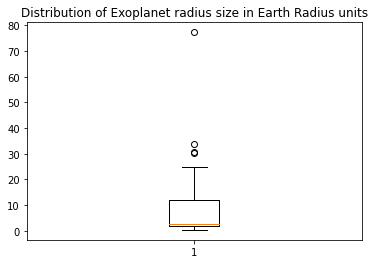

In [14]:
#a measure of a planet's size: Length of it's radius, in units of the radius of the Earth.
plt.title('Distribution of Exoplanet radius size in Earth Radius units')
plt.boxplot(df['pl_rade']);

In [15]:
df['pl_rade'].max()

77.342

In [16]:
df[df['pl_rade']== 77.342]

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
387,HD 100546 b,HD 100546,Paranal Observatory,157.57001,53.0,77.342,6.9,239000.0,752.0,0.09,98.09,840.0


Similar to the above, I will drop the most extreme outlier, and leave the outliers closer to the body of the graph in.

In [17]:
df = df.drop(index = 387)

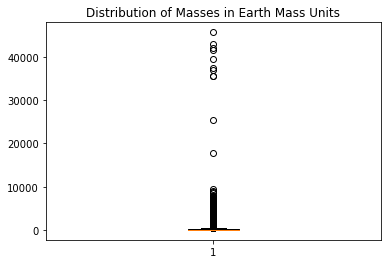

In [18]:
#best estimated measure of a planet's mass, in units of Earth's mass.
plt.title('Distribution of Masses in Earth Mass Units')
plt.boxplot(df['pl_bmasse']);

Lots of outliers here, but dropping the 8 highest feels comfortable.

In [19]:

df[df['pl_bmasse'] >= 30_000]

,pl_name,hostname,disc_facility,pl_orbper,pl_orbsmax,pl_rade,pl_radj,pl_bmasse,pl_bmassj,pl_orbeccen,pl_insol,pl_eqt
1345,K2-52 b,K2-52,K2,3.535055,0.0540,18.00,1.606,45700.0,144.0,0.07,1124.00,2004.0
3160,Kepler-470 b,Kepler-470,Kepler,24.669196,0.2322,14.44,1.288,35600.0,112.0,0.00,41.20,1485.0
3161,Kepler-471 b,Kepler-471,Kepler,5.014235,0.0626,14.96,1.335,37000.0,117.0,0.00,1146.88,1308.0
3179,Kepler-485 b,Kepler-485,Kepler,3.243260,0.0433,14.41,1.286,35500.0,112.0,0.00,622.01,1243.0
3183,Kepler-488 b,Kepler-488,Kepler,3.120829,0.0428,15.79,1.409,39400.0,124.0,0.00,778.51,1303.0
3192,Kepler-493 b,Kepler-493,Kepler,3.003877,0.0439,15.13,1.350,37500.0,118.0,0.00,1414.33,1438.0
3489,Kepler-718 b,Kepler-718,Kepler,2.052350,0.0322,16.56,1.477,41600.0,131.0,0.00,1324.20,1497.0
3658,Kepler-840 b,Kepler-840,Kepler,2.495780,0.0355,17.07,1.523,43000.0,135.0,0.00,2258.80,1408.0
3676,Kepler-854 b,Kepler-854,Kepler,2.144633,0.0334,16.72,1.492,42000.0,132.0,0.00,7282.96,1736.0


In [20]:
df = df.drop(df[df['pl_bmasse'] >= 30_000].index)

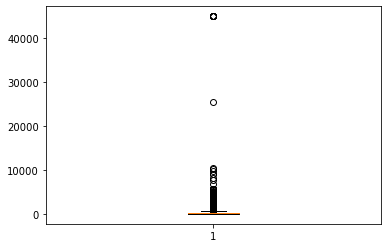

In [21]:
#insolation flux is one way of measuring a planet's temperature.

plt.boxplot(df['pl_insol']);

In [22]:
df['pl_insol'].max()

44900.0

As above, so below:  dropping the one outlier that is way, way out on its own.

In [23]:

df = df.drop(df[df['pl_insol'] >= 20_000].index)

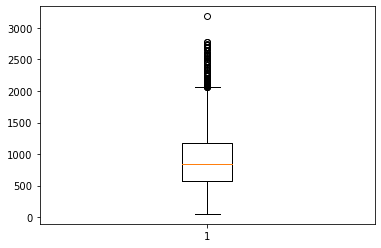

In [24]:
#The prettiest box plot yet!  I'll leave these as is.
plt.boxplot(df['pl_eqt']);

Thankfully, after culling these outliers, I still have many, many rows to work with.  What's more, after reading more into my data dictionary, I'm dropping some columns that are measures of the same metric, but in different units.

In [25]:
print(df.shape)

df = df.drop(columns = ['pl_radj', 'pl_bmassj'])
print(df.shape)

(4345, 12)
(4345, 10)


In [27]:
df.to_csv('../datasets/clean_planetary_data.csv')

In [28]:
df.columns

Index(['pl_name', 'hostname', 'disc_facility', 'pl_orbper', 'pl_orbsmax',
       'pl_rade', 'pl_bmasse', 'pl_orbeccen', 'pl_insol', 'pl_eqt'],
      dtype='object')